## Strava Analysis, using python and jupyter notebook to save paying the annual premium membership

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plot

## Import the raw data from the strava export file and rename the header to stip out whitespace and add underscores

In [101]:
export = pd.read_csv('activities.csv')

In [102]:
export.columns = export.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## Convert activity date from string to date and create new date dimensions

In [110]:
export['activity_date'] = pd.to_datetime(export['activity_date'])
export['year'] = pd.DatetimeIndex(export['activity_date']).year
export['month'] = pd.DatetimeIndex(export['activity_date']).month
export['year_month'] = pd.to_datetime(export['activity_date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

## Create new dataframe to hold only the columns required for analysis

In [111]:
data = pd.DataFrame(export, columns=['activity_date','activity_type','elapsed_time','distance','relative_effort','commute','moving_time','elevation_gain','elevation_loss','max_grade','average_grade','average_heart_rate','calories','year','month','year_month'])

## Apply a filter for 2020 activities only

In [118]:
is2020 = data['year']==2020
new_data = data[is2020]
results = new_data.groupby(['year_month','activity_type'])['distance'].sum()

In [119]:
results

year_month  activity_type
2020-1      Run              231.09
2020-2      Run              163.14
2020-3      Ride               8.46
            Run              203.82
2020-4      Ride             112.93
            Run               87.64
2020-5      Ride              72.31
            Run               83.12
Name: distance, dtype: float64

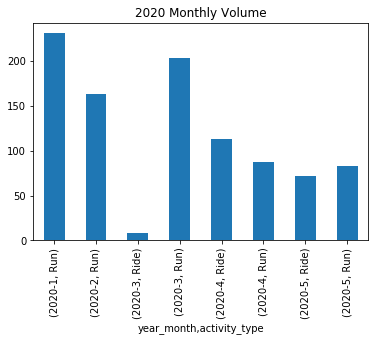

In [116]:
results.plot.bar (x='distance', y='year_month', title='2020 Monthly Volume', stacked=True)